In [1]:
import  os
from keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array,load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import cvutils
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import keras
from keras.utils import plot_model
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [2]:
data    = []
labels  = []
Parasitized  = os.listdir("cell_images/Parasitized/")
Uninfected   = os.listdir("cell_images/Uninfected/")

In [3]:
for i in Parasitized:
    if i != "Thumbs.db":
        image = cv2.imread("cell_images/Parasitized/" + i)
        #image_from_array = Image.fromarray(image, 'RGB')
        size_image = cv2.resize(image, (50, 50))
        data.append(np.array(size_image))
        labels.append(1)
for j in Uninfected:
    if j != "Thumbs.db":
        image = cv2.imread("cell_images/Uninfected/" + j)
       # image_from_array = Image.fromarray(image, 'RGB')
        #size_image = image_from_array.resize((224, 224))
        size_image = cv2.resize(image, (50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    

In [4]:
print(len(data))
print(len(labels))

27558
27558


In [5]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

idx = np.arange(cells.shape[0])
np.random.shuffle(idx)
cells = cells[idx]
labels = labels[idx]

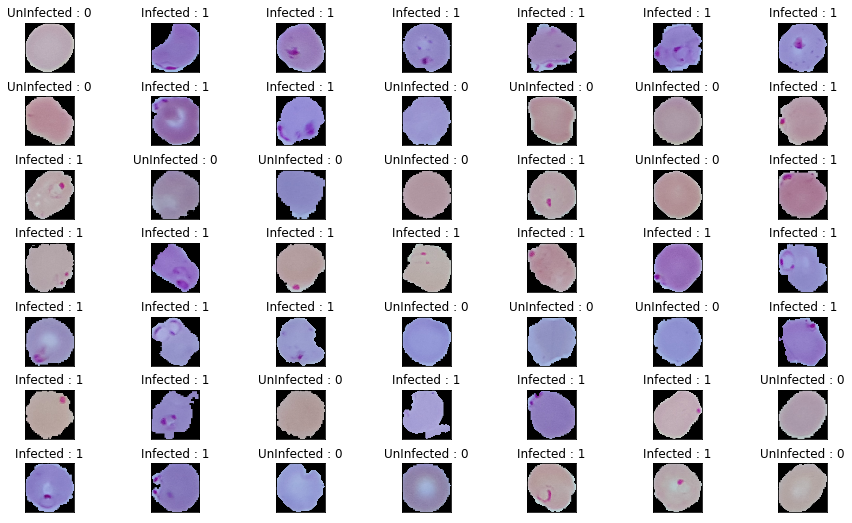

In [6]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'UnInfected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [7]:
# Normalize data set to 0-to-1 range

x_train, x_test, y_train, y_test = train_test_split(cells, labels, test_size = 0.2, random_state = 101)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/255
x_test/255


    

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [8]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,2)
y_test  = keras.utils.to_categorical(y_test,2)

In [18]:

model = Sequential()

In [19]:
model.add(Conv2D(32,kernel_size = (3,3),padding = 'same',input_shape = (50,50,3),activation = "relu"))
#model.add(Conv2D(32,kernel_size = (3,3),activation = "relu")) #k
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.25))  # activated now


model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = "relu"))
#model.add(Conv2D(64,kernel_size = (3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.25)) 


model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = "relu"))
#model.add(Conv2D(64,kernel_size = (3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(110, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation = "softmax"))
#model.add(Dense(1,activation = "sigmoid"))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
__________

In [20]:
model.compile(
                loss= 'categorical_crossentropy',
                optimizer= "adam",
                metrics= ['accuracy']
             )

In [21]:
#x_train, x_test, y_train, y_test
model.fit(
            x_train,
            y_train,
            batch_size= 50,
            epochs= 10,
            validation_data= (x_test,y_test),
            shuffle= True
         )

Train on 22046 samples, validate on 5512 samples
Epoch 1/10
22046/22046 [==============================] - 157s 7ms/step - loss: 0.4528 - acc: 0.7839 - val_loss: 0.3973 - val_acc: 0.8917
Epoch 2/10
22046/22046 [==============================] - 186s 8ms/step - loss: 0.1872 - acc: 0.9405 - val_loss: 0.1640 - val_acc: 0.9427
Epoch 3/10
22046/22046 [==============================] - 157s 7ms/step - loss: 0.1704 - acc: 0.9459 - val_loss: 0.1614 - val_acc: 0.9505
Epoch 4/10
22046/22046 [==============================] - 158s 7ms/step - loss: 0.1552 - acc: 0.9509 - val_loss: 0.1355 - val_acc: 0.9568
Epoch 5/10
22046/22046 [==============================] - 156s 7ms/step - loss: 0.1430 - acc: 0.9528 - val_loss: 0.2597 - val_acc: 0.9272
Epoch 6/10
22046/22046 [==============================] - 156s 7ms/step - loss: 0.1338 - acc: 0.9556 - val_loss: 0.1382 - val_acc: 0.9568
Epoch 7/10
22046/22046 [==============================] - 156s 7ms/step - loss: 0.1340 - acc: 0.9560 - val_loss: 0.1534 - v

In [29]:
#!pip install GraphViz


In [30]:
#!pip install graphviz